In [ ]:
import numpy as np

def sigmoid(soma):
    return 1 / (1 + np.exp(-soma))

def sigmoidDerivada(sig):
    return sig * (1 - sig)


entradas = np.array([[0,0],
                     [0,1],
                     [1,0],
                     [1,1]])

saidas = np.array([[0],
                   [1],
                   [1],
                   [0]])

# pesos0 = np.array([[-0.424, -0.740, -0.961],
#                   [0.358, -0.577, -0.469]])

# pesos1 = np.array([[-0.017], [-0.893], [0.148]])

pesos0 = 2*np.random.random((2,3)) - 1
pesos1 = 2*np.random.random((3,1)) - 1

epocas = 100000
taxaAprendizagem = .1
momento = 1

erro = np.zeros(epocas)
p0 = np.zeros((epocas,2,3))
p1 = np.zeros((epocas,3,1))
saida = np.zeros((epocas,4))


for j in range(epocas):
    p0[j] = pesos0
    p1[j] = pesos1

    camadaEntrada = entradas
    somaSinapse0 = np.dot(camadaEntrada, pesos0)
    camadaOculta = sigmoid(somaSinapse0)

    somaSinapse1 = np.dot(camadaOculta, pesos1)
    camadaSaida = sigmoid(somaSinapse1)
    saida[j,:] = camadaSaida.T

    erroCamadaSaida = saidas - camadaSaida
    mediaAbsoluta = np.mean(np.abs(erroCamadaSaida))
    erro[j] = mediaAbsoluta

    deltaSaida = sigmoidDerivada(camadaSaida) * erroCamadaSaida
    deltaCamadaOculta = deltaSaida.dot(pesos1.T) * sigmoidDerivada(camadaOculta)

    pesosNovo1 = camadaOculta.T.dot(deltaSaida)
    pesos1 = (pesos1 * momento) + (pesosNovo1 * taxaAprendizagem)

    pesosNovo0 = camadaEntrada.T.dot(deltaCamadaOculta)
    pesos0 = (pesos0 * momento) + (pesosNovo0 * taxaAprendizagem)



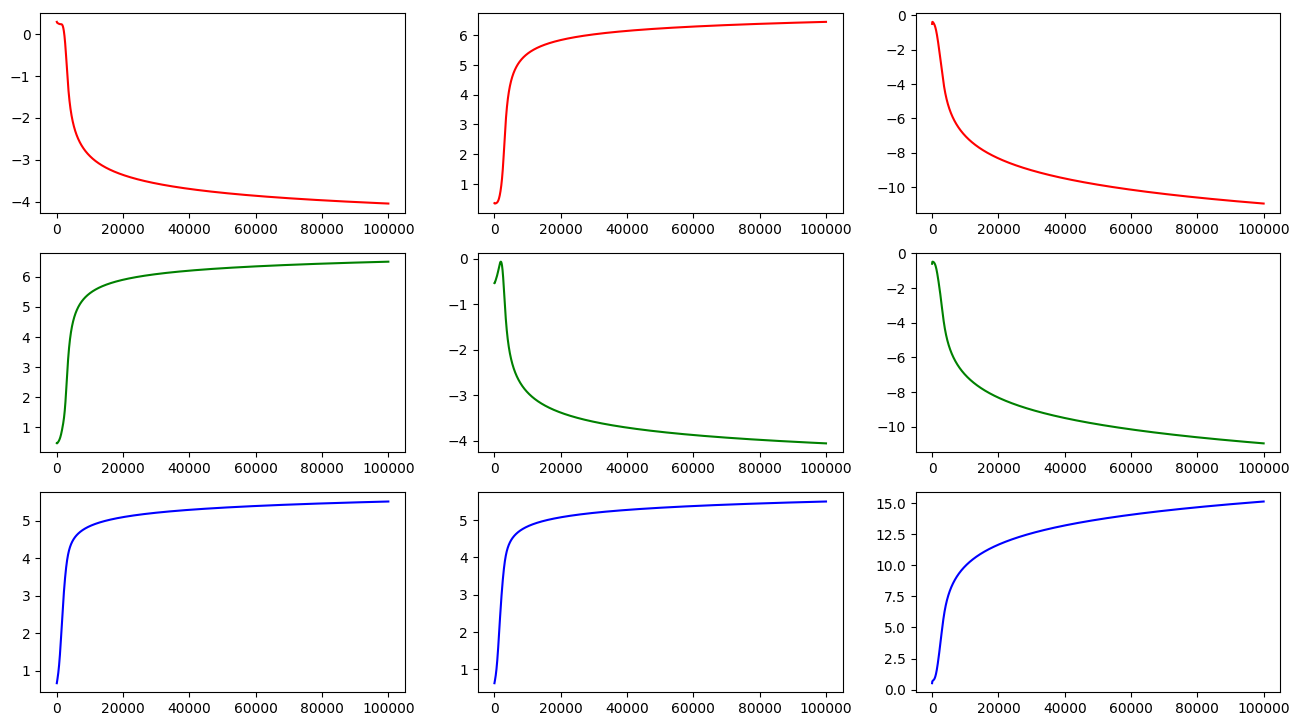

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,3)
fig.set_size_inches(16, 9)
fig.dpi = 100


ax[0,0].plot(p0[:,0,0], color='r')
ax[1,0].plot(p0[:,0,1], color='g')
ax[2,0].plot(p0[:,0,2], color='b')

ax[0,1].plot(p0[:,1,0], color='r')
ax[1,1].plot(p0[:,1,1], color='g')
ax[2,1].plot(p0[:,1,2], color='b')


ax[0,2].plot(p1[:,0,0], color='r')
ax[1,2].plot(p1[:,1,0], color='g')
ax[2,2].plot(p1[:,2,0], color='b')

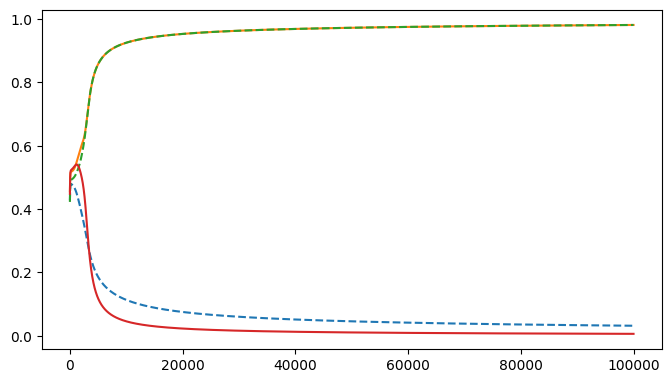

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(16/2, 9/2)
fig.dpi = 100

ax.plot(saida[:,0], ls='--')
ax.plot(saida[:,1])
ax.plot(saida[:,2], ls='--')
ax.plot(saida[:,3])


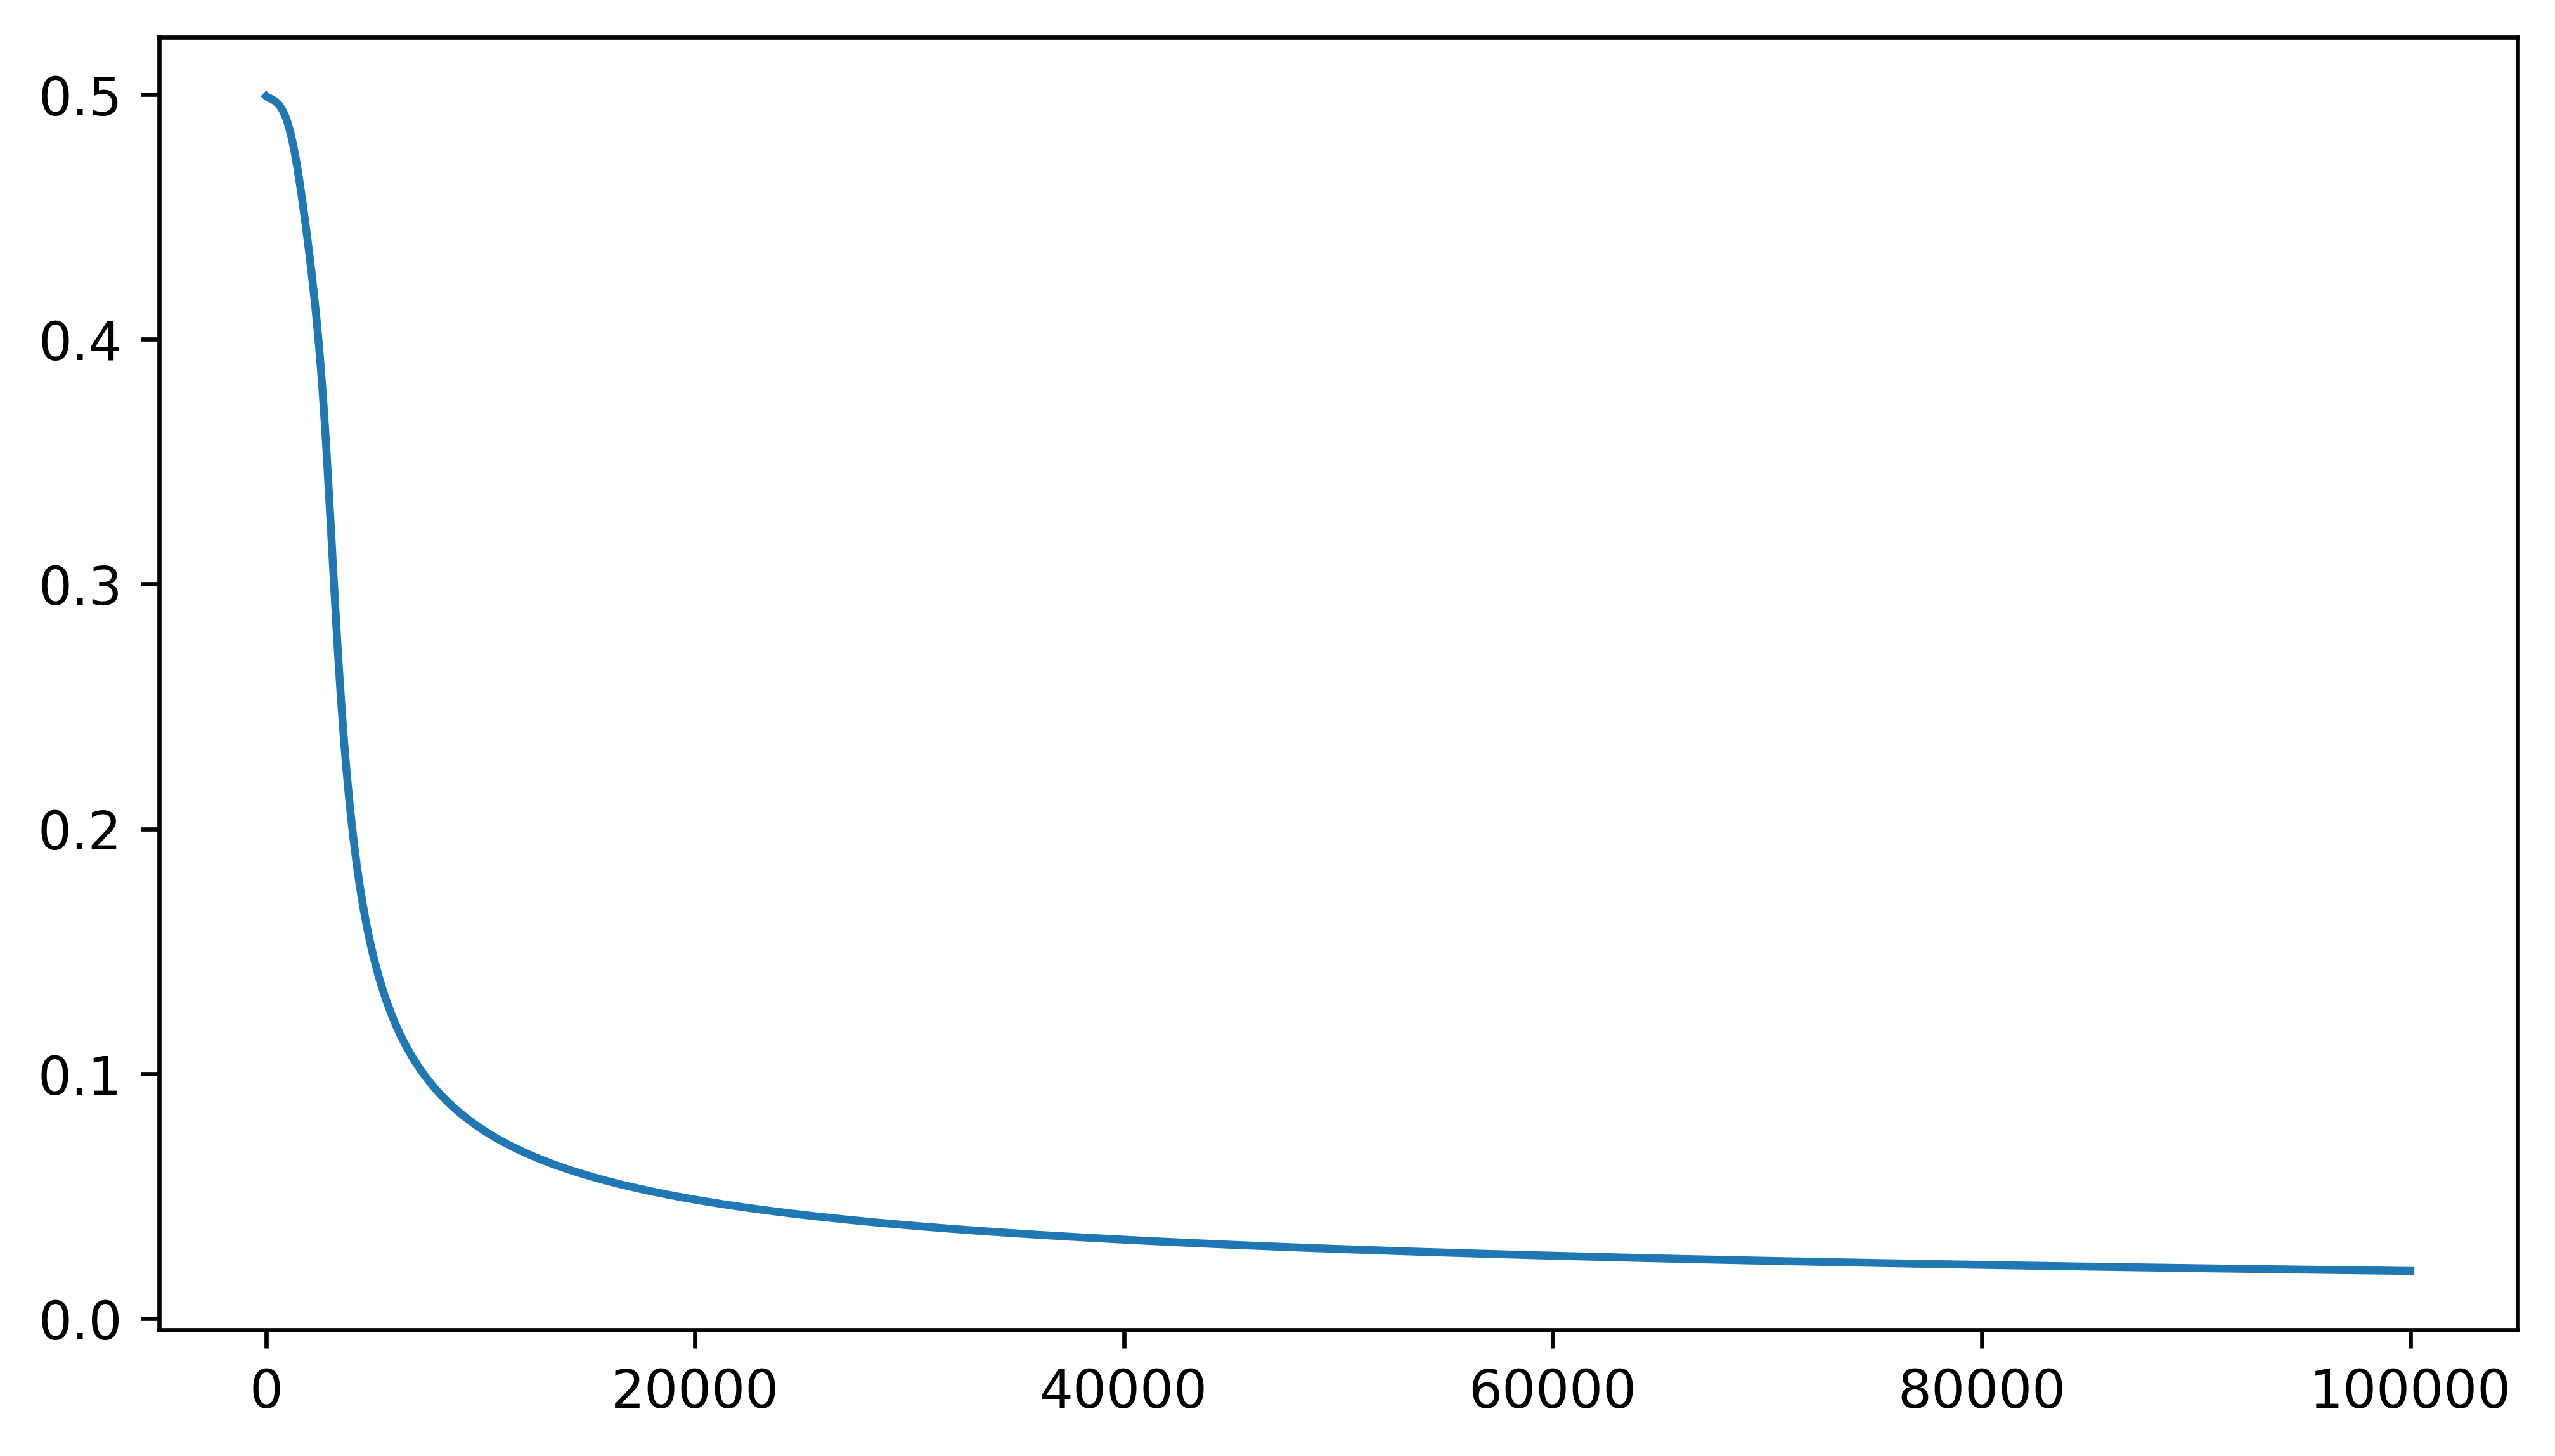

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16/2, 9/2)
fig.dpi = 600

ax.plot(erro)